Code to extract the frequency estimates from the no byzantine with varied white tiles test

In [2]:
import os
import random

import numpy as np
import pandas as pd
from jedi.api import file_name

# folder_names = ["experiment_test1"]
number_of_experiments = 10
number_of_robots = 20
#In this context, an experiment refers to a set of 10 (subject to change) runs of the simulation with that config

# harm_df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine_0.75/no_byzantine75.csv")

# harm_diff = harm_df.median() #putting loads of shit on the end for some reason
harm_diff = 1.780535

def get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        estimate_list = []
        path_to_data = experiment_name + folder_name + "/"
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"

            df = pd.read_csv(path_to_robot, sep=" ")
            if "Estimate" in df.columns:
                #Need to filp it, have the actual percentages as the col names
                last_estimate = df["Estimate"].iloc[-1]
                difference = 100 * (abs(last_estimate - 0.75))
                estimate_list.append(difference)

                # new_row = pd.DataFrame([[folder_name, last_estimate]], columns=estimate_df.columns)
                # estimate_df = pd.concat([estimate_df, new_row], ignore_index=True)
        estimate_df[folder_name] = estimate_list

    print(os.getcwd())
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

folder_names = ["1","2","3","4","5","6","7","8"]
# folder_names = ["1"]


# get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, "byzantine_binary","collected_results/byzantine_binary/byzantine_binary_")

In [95]:
def convert_strobel_byzantine(filename, save_name, attribute):
    convert_df = pd.DataFrame()
    strobel = pd.read_csv("data_strobel_et_al2019/" +filename)
    for i in range(8):
        arr = []
        for index, row in strobel.iterrows():
            if row["byz"] == i:
                arr.append(row[attribute])
        print(len(arr), i, filename)
        convert_df[str(i)] = pd.Series(arr)

    convert_df.to_csv(save_name + ".csv", index=False)
    
def convert_strobel_time(filenames, col_names, save_name):
    convert_df = pd.DataFrame()
    
    for i in range(len(filenames)):
        arr = []
        strobel = pd.read_csv("data_strobel_et_al2019/" + filenames[i])
    
        for index, row in strobel.iterrows():
            if row["byz"] == 0:
                arr.append(row["clock"])
        convert_df[col_names[i]] = pd.Series(arr)
    convert_df.to_csv(save_name + ".csv", index=False)
        
    
def convert_strobel_No(filename, save_name, attribute):
    convert_df = pd.DataFrame()
    strobel = pd.read_csv("data_strobel_et_al2019/" +filename)
    for i in range(11):
        arr = []
        for index, row in strobel.iterrows():
            if row["actual"] == (i*10):
                arr.append(row[attribute])
        print(len(arr), i, filename)
        convert_df[str(i)] = pd.Series(arr)
    
    convert_df.to_csv(save_name + ".csv", index=False)
    
    
file_names = ["3_Threshold_Byzantine_1.csv", "3_Threshold_Byzantine_2.csv","3_Threshold_Byzantine_3.csv"]
col_names = ["LCP","WSMR","PoW"]

convert_strobel_time(file_names, col_names, "StrobelConsensusTimes")

# convert_strobel_byzantine("3_Threshold_Byzantine_3.csv", "Strobel_consensus_time","clock")
# file_arr = ["1_Plain_1.csv","1_Plain_2.csv","1_Plain_3.csv"]
# name_arr = ["Strobel_LCP_No","Strobel_WSMR_No","Strobel_Blockchain_No"]
# 
# file_arr_byz = ["2_Byzantine_1.csv","2_Byzantine_2.csv","2_Byzantine_3.csv"]
# save_arr_byz = ["Strobel_LCP_Byzantine_time", "Strobel_WSMR_byzantine_time","Strobel_Blockchain_byzantine_time"]
# 
# 
# for i in range(len(file_arr_byz)):
#     convert_strobel_byzantine(file_arr_byz[i], save_arr_byz[i])
    
# for i in range(len(file_arr)):
#     convert_strobel_No(file_arr[i], name_arr[i] + "AE", "absError")
#     convert_strobel_No(file_arr[i], name_arr[i] + "pred", "predicted")

Creating the box plots for the no byzantine data actual tile estimated

In [3]:
number_of_experiments = 10
number_of_robots = 20

folder_names = ["8","9","10","11","12","13","14","15","16","17","18","19"]

def get_byzantine_blocks(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        path_to_data = experiment_name + folder_name + "/"
        byzantine_blocks = []
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"
            df = pd.read_csv(path_to_robot, sep=" ")
            if "Byzantine" in df.columns:
                for index, row in df.iterrows():
                    byzantine_blocks.append(row["Byzantine"])

        byzantine_fraction = sum(byzantine_blocks) / len(byzantine_blocks)
        estimate_df[folder_name] = [byzantine_fraction]
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

# get_byzantine_blocks(folder_names,10,20,"byzantine_blocks","collected_results/vote_test/byzantine_")

Actual percentage of white tiles vs estimate vary grid size

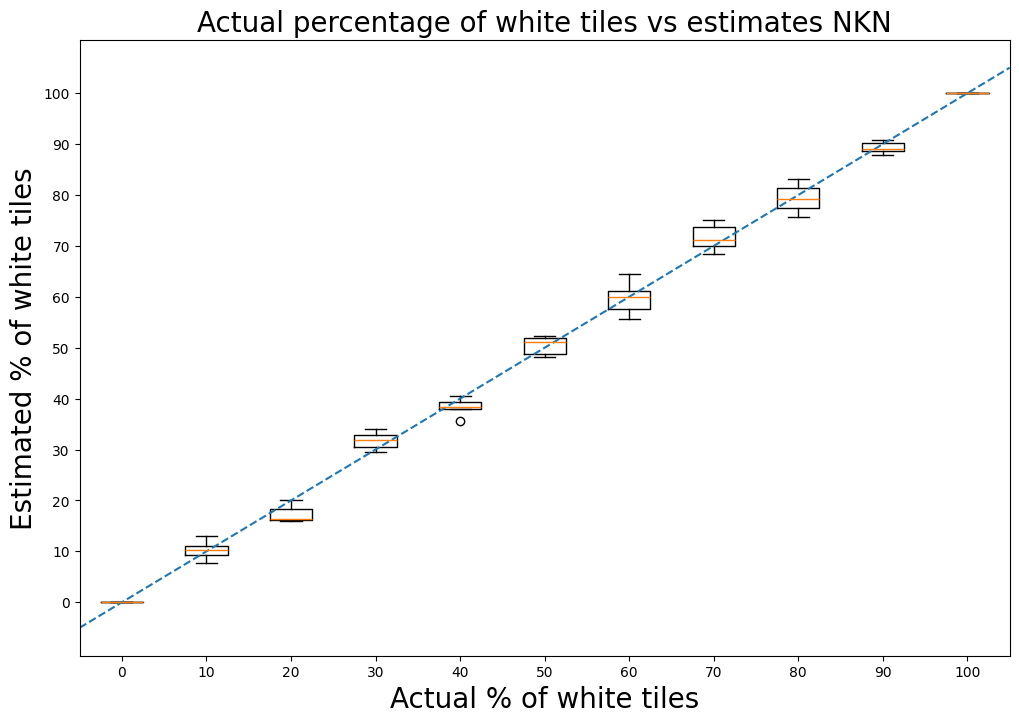

<Figure size 1200x800 with 0 Axes>

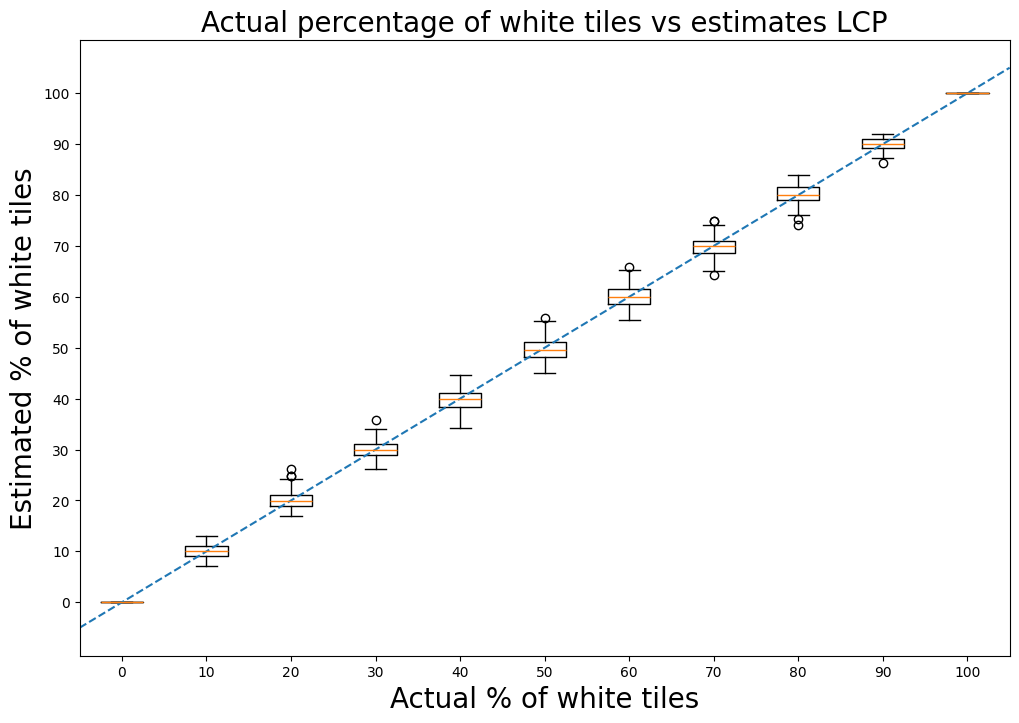

<Figure size 1200x800 with 0 Axes>

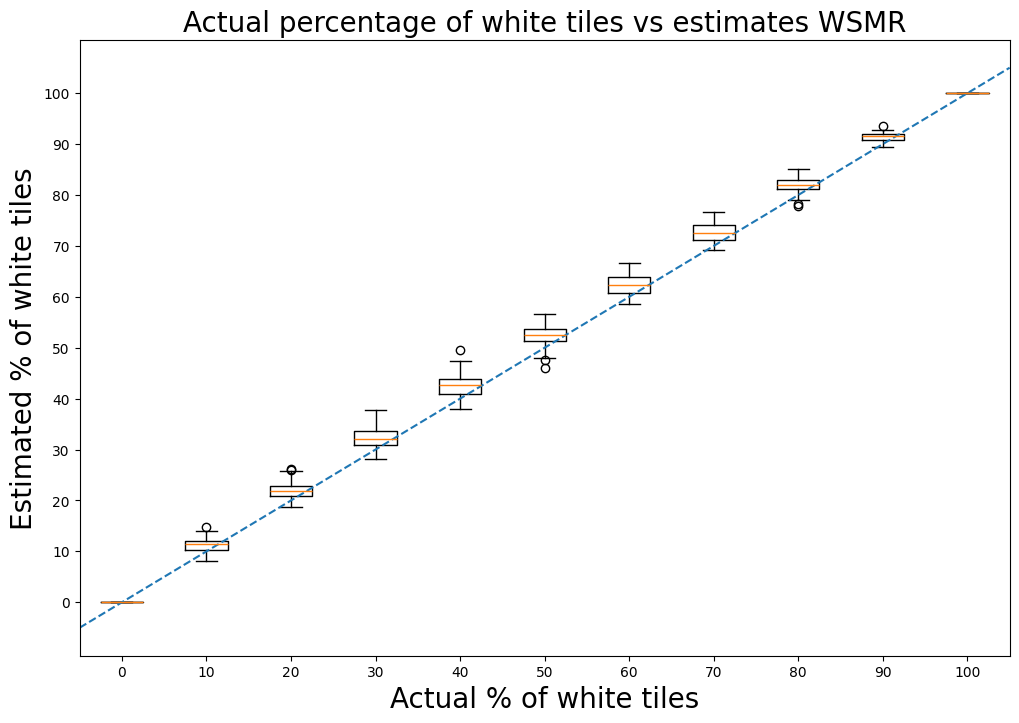

<Figure size 1200x800 with 0 Axes>

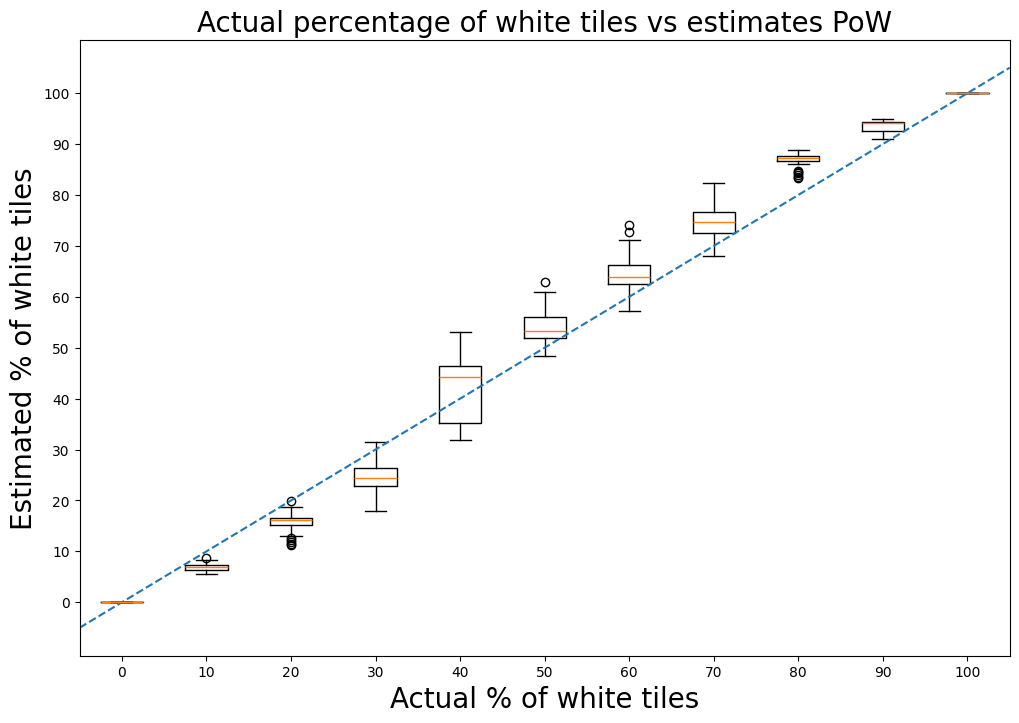

<Figure size 1200x800 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
import numpy as np


df_NKN = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/vary_tiles_no_byzantine.csv")
df_POW = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_Nopred.csv")
df_LCP = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_Nopred.csv")
df_WSMR= pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_Nopred.csv")

name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_Actual","LCP_Actual","WSMR_Actual","PoW_Actual"]



actual_df_arr = [df_NKN, df_LCP, df_WSMR, df_POW]


def plot_actual_vs_estimate(df, title, save_name):
    fig, ax = plt.subplots(figsize = (12,8))
    
    plt.figure(figsize = (12,8))
    actual_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.plot([x_min,x_max], [y_min,y_max], "--")
    
    ax.set_yticks([x*10 for x in range(11)])
    
    
    ax.set_title("Actual percentage of white tiles vs estimates " + title, fontsize=20)
    ax.set_ylabel("Estimated % of white tiles", fontsize = 20)
    ax.set_xlabel("Actual % of white tiles", fontsize = 20)
    
    plt.tight_layout()
    fig.savefig(save_name)
    plt.show()
    
for i in range(len(actual_df_arr)):
    plot_actual_vs_estimate(actual_df_arr[i], name_arr[i], save_name[i])

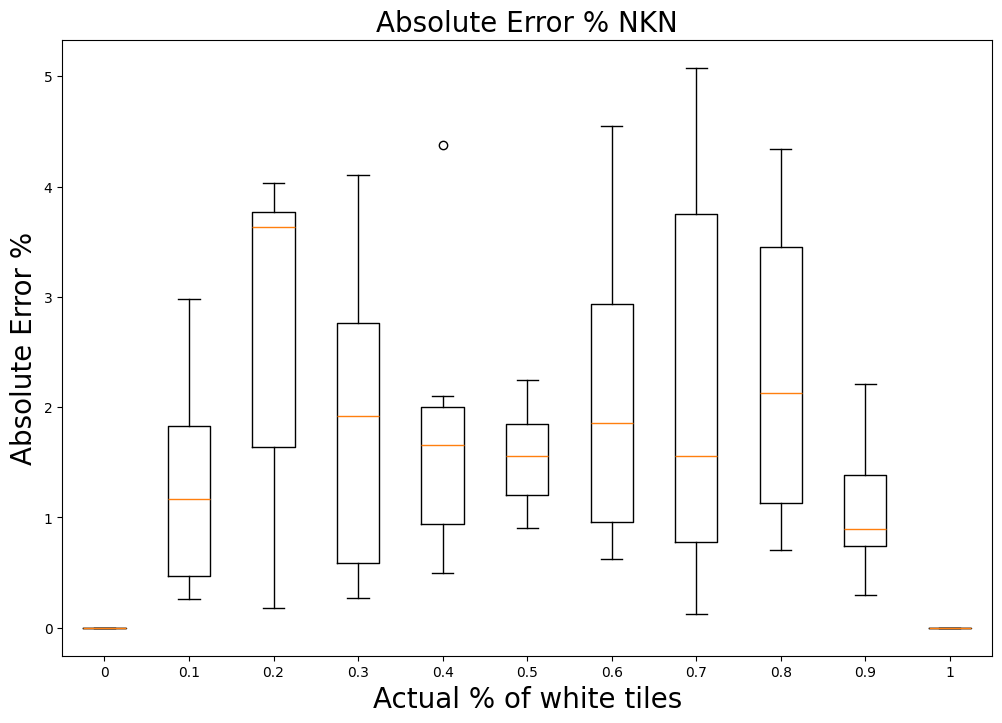

<Figure size 1200x800 with 0 Axes>

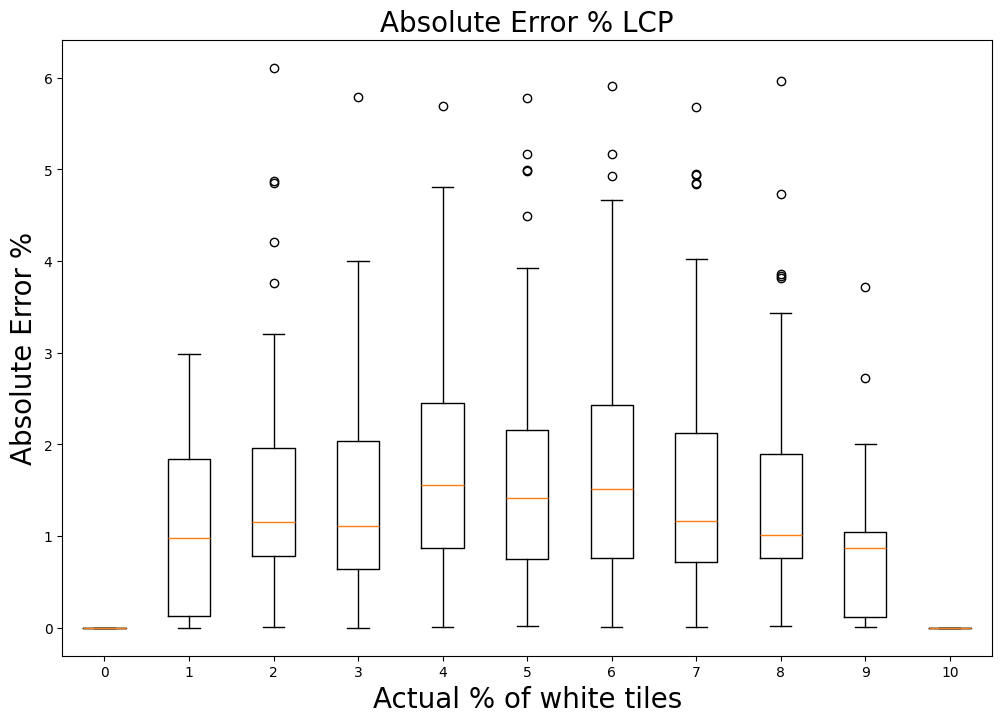

<Figure size 1200x800 with 0 Axes>

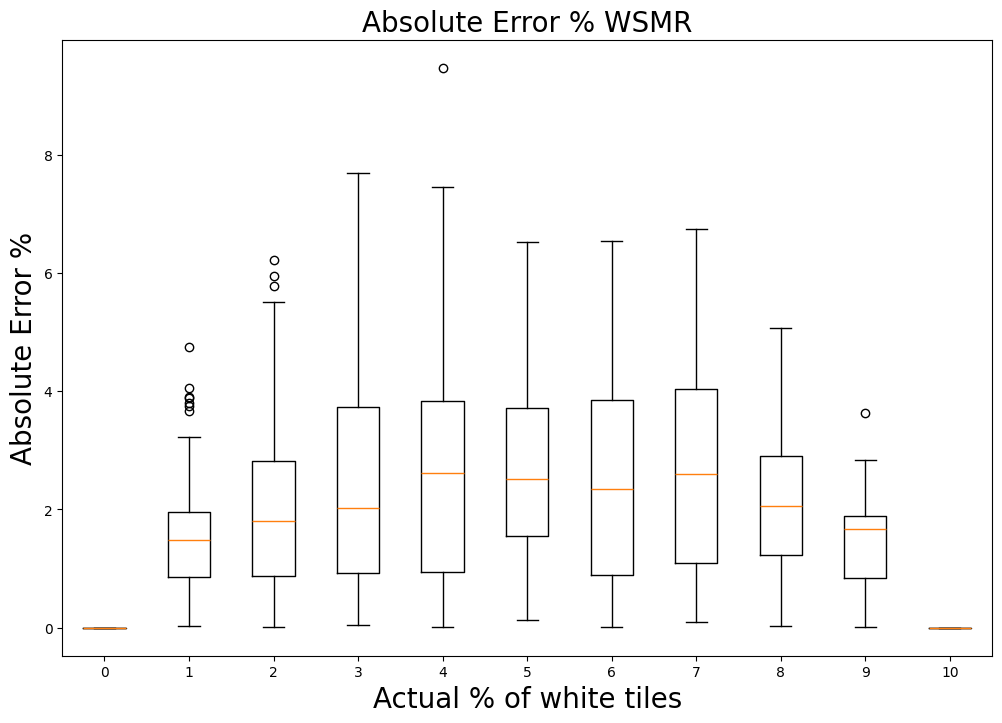

<Figure size 1200x800 with 0 Axes>

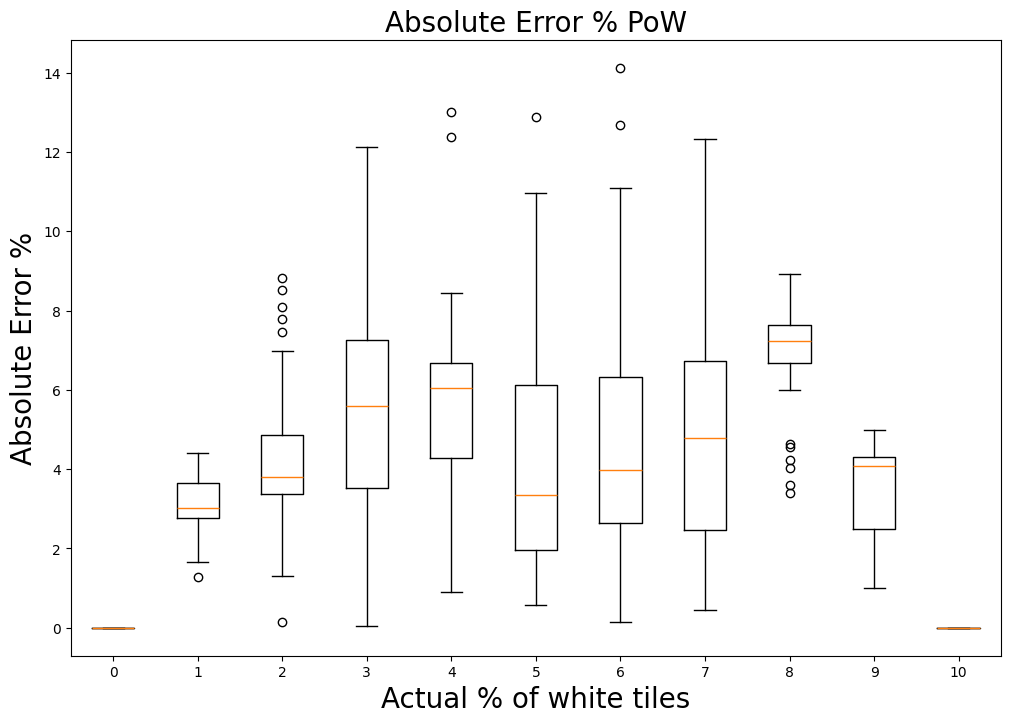

<Figure size 1200x800 with 0 Axes>

In [84]:
df_NKN = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/vary_tiles_no_byzantine_AE.csv")
df_PoW = pd.read_csv("//Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_NoAE.csv")
df_LCP = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_NoAE.csv")
df_WSMR = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_NoAE.csv")

df_arr = [df_NKN, df_LCP,  df_WSMR, df_PoW]
name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_AE","LCP_AE","WSMR_AE","PoW_AE"]

def plot_AE_no_byz(df, title, save_name):
    fig, ax = plt.subplots(figsize = (12,8))
    
    plt.figure(figsize = (12,8))
    AE_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)
    
    ax.set_yticks([x for x in range(51) if x % 5 ==0])
    
    ax.set_title("Absolute Error % " + title, fontsize = 20)
    ax.set_ylabel("Absolute Error %", fontsize = 20)
    ax.set_xlabel("Actual % of white tiles", fontsize = 20)
    fig.savefig(save_name)
    plt.show()
    
for i in range(len(actual_df_arr)):
    plot_AE_no_byz(df_arr[i], name_arr[i], save_name[i])

<Figure size 1200x800 with 0 Axes>

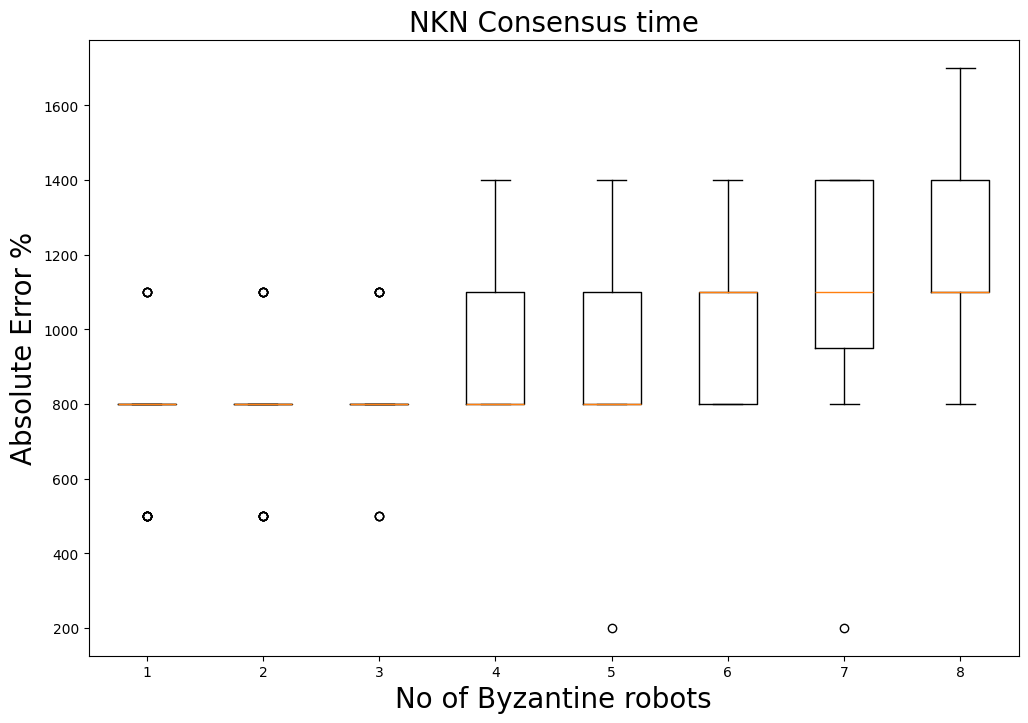

<Figure size 1200x800 with 0 Axes>

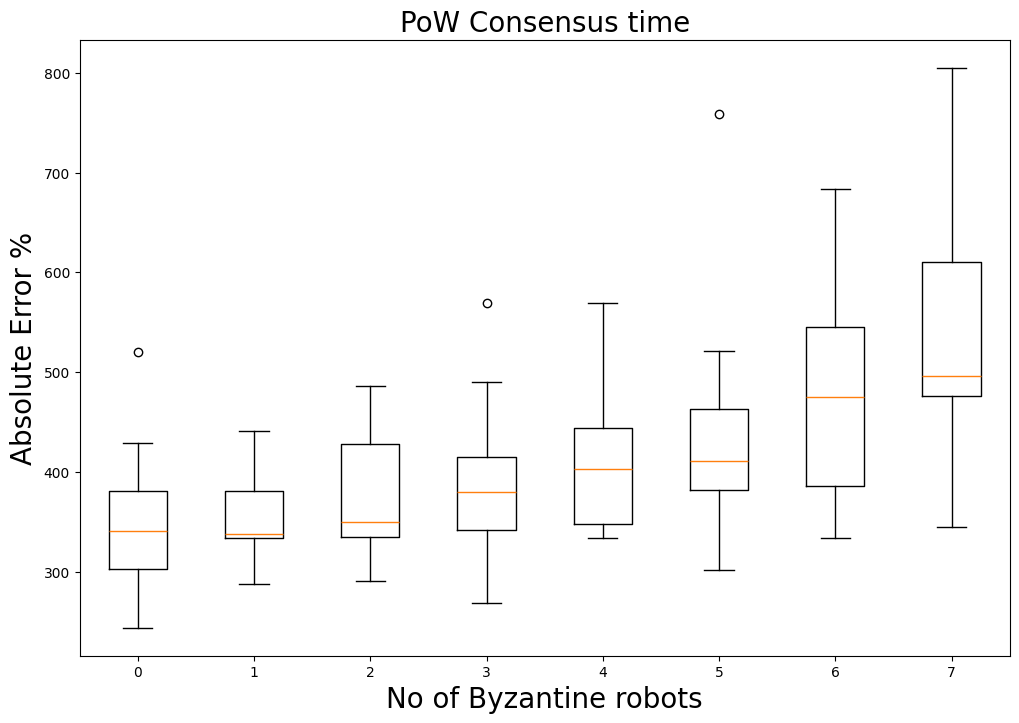

In [86]:
df_NKN = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine_03_40.csv")
df_PoW = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_byzantine_time.csv")
df_LCP = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_Byzantine_time.csv")
df_WSMR = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_byzantine_time.csv")

df_arr = [df_NKN, df_LCP,  df_WSMR, df_PoW]
name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_Byz_AE","LCP_Byz_AE","WSMR_Byz_AE","PoW_Byz_AE"]

def plot_save_loess_byzantine(df, title, filename):
    df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

    plt.figure(figsize = (12,8))
    fig, ax = plt.subplots(figsize = (12,8))

    x = np.arange(1, df.shape[1] + 1)
    y = df.median()

    smoothed = lowess(y, x, frac=0.6)

    ax.plot(smoothed[:,0], smoothed[:,1], "r-")


    AE_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)

    #ax.set_yticks([x for x in range(75) if x % 5 ==0])

    ax.set_title(title, fontsize = 20)
    ax.set_ylabel("Absolute Error %", fontsize=20)
    ax.set_xlabel("No of Byzantine robots", fontsize=20)
    fig.savefig(filename)
    plt.show()


          1         2         3         4         5          6          7  \
0  0.349167  0.061167  3.239333  1.512000  3.777750  10.581667   9.259630   
1  0.466500  1.233333  3.255833  0.736667  6.694667   7.351852   7.325667   
2  2.363833  6.578333  2.275088  5.775000  4.684333   8.555167  10.050991   
3  0.166667  1.162667  0.232333  7.088500  5.316167   7.984667   9.560833   
4  4.027000  2.783833  5.644500  2.868500  7.808519   8.058421   8.566667   
5  1.677667  2.209333  5.266917  2.777333  5.731404   8.853333   8.633500   
6  0.909035  0.635556  5.827500  6.817000  5.968833  10.511000  12.574074   
7  0.957506  0.833000  4.069167  1.544167  7.777333   6.542057  13.217333   

           8  
0   9.280702  
1   8.953167  
2   8.139000  
3   8.604667  
4   8.062167  
5   9.690000  
6  13.194833  
7  12.444333  


<Figure size 1200x800 with 0 Axes>

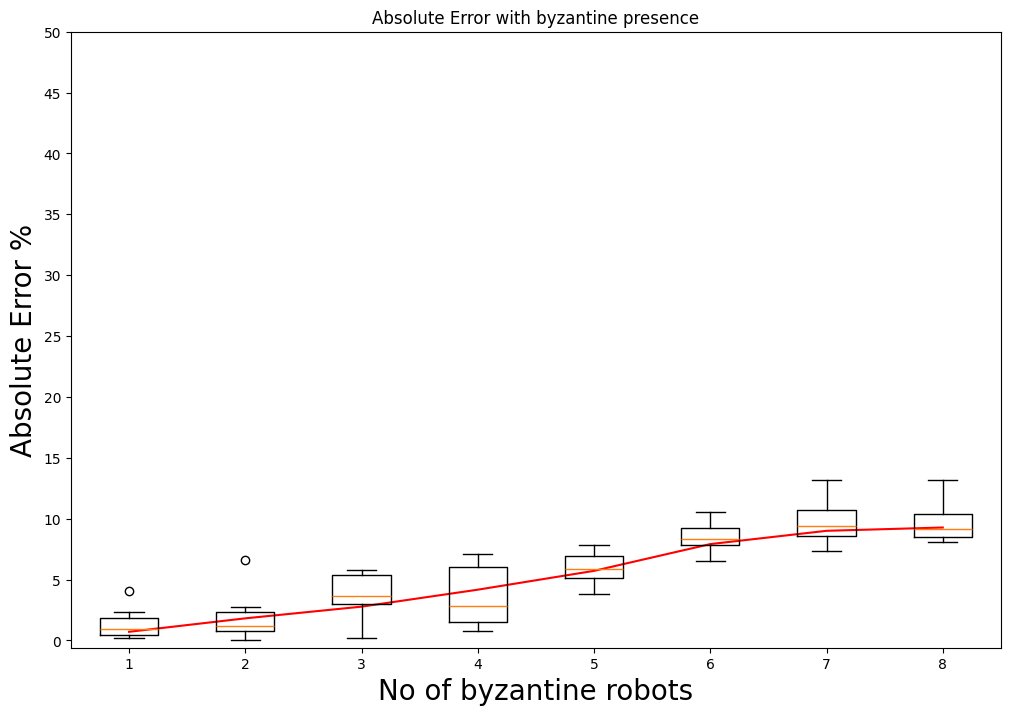

In [17]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_3 = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine_0.3.csv")

print(df_3)

plot_save_loess_byzantine(df_3,"Absolute Error with byzantine presence","No of byzantine robots","Absolute Error %","AEByzantine.png")


<Figure size 1200x800 with 0 Axes>

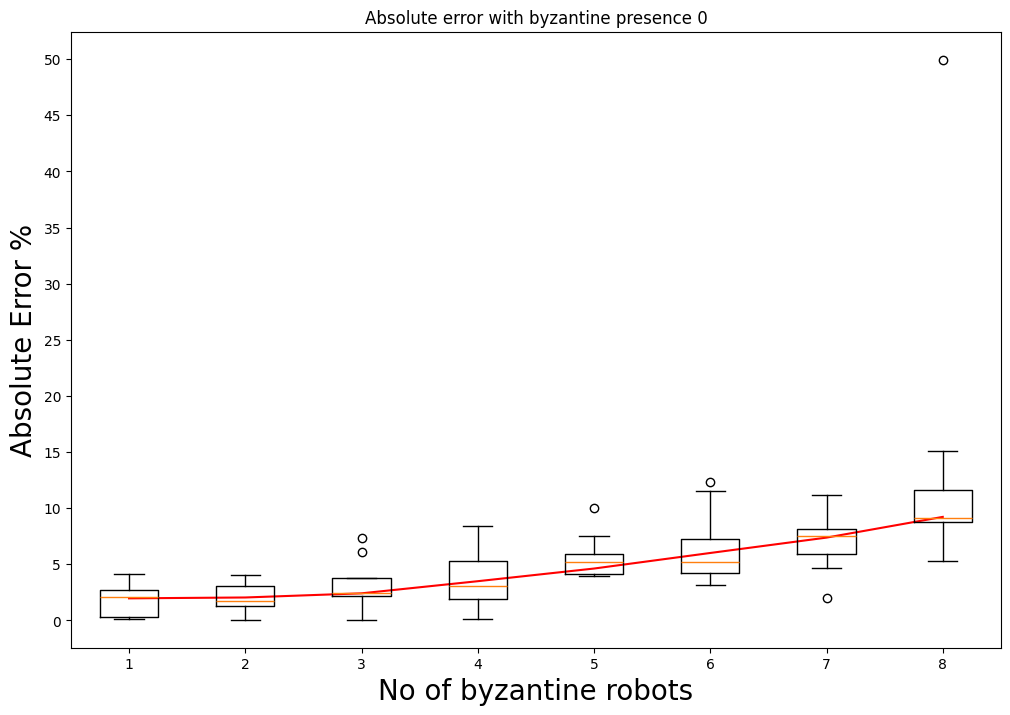

In [8]:
df_0 = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine03_0.csv")

plot_save_loess_byzantine(df_0,"Absolute error with byzantine presence 0","No of byzantine robots", "Absolute Error %","AEByzantine0.png")


In [9]:
#Byzantine with random inputs
df_random = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine03Random.csvv")

plot_save_loess_byzantine(df_random, "Absolute Error with byzantine random inputs","No of byzantine robots","Absolute Error %", "AEByzantine.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine03Random.csvv'

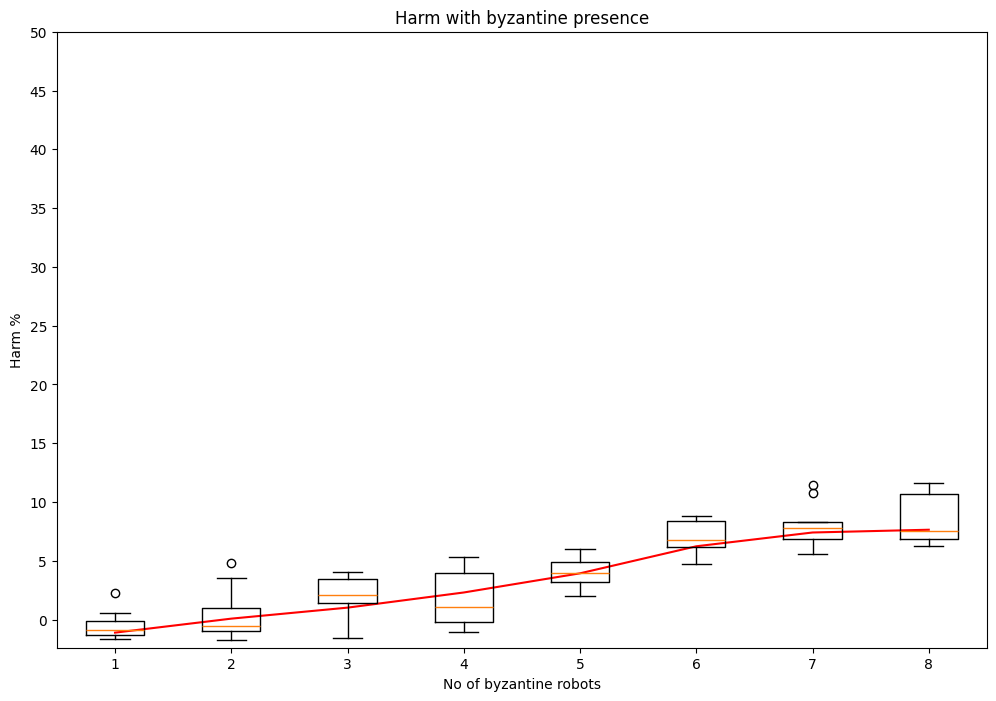

<Figure size 1200x800 with 0 Axes>

In [16]:
df_3_harm = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/byzantine03Harm.csv")

fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(1, df_3_harm.shape[1] + 1)
y = df_3_harm.median()

smoothed = lowess(y, x, frac=0.6)

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize=(12, 8))
AE_box = ax.boxplot([df_3_harm[col] for col in df_3_harm.columns],
                    tick_labels=df_3_harm.columns,
                    patch_artist=False)

ax.set_yticks([x for x in range(51) if x % 5 == 0])

ax.set_title("Harm with byzantine presence")
ax.set_ylabel("Harm %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("HarmByzantine.png")
plt.show()


Some plot showing the voting sucess by doing a line plot of the fraction of byzantine blocks, where each time there was a byzantine block it is when the voting system converged to the byzantine votes

Plotting consensus time 

      0    1    2    3    4    5    6    7
0   290  374  336  342  336  479  382  664
1   381  335  334  432  474  474  475  616
2   341  338  431  380  425  432  429  522
3   381  340  341  490  387  473  431  496
4   425  430  339  333  522  382  664  345
5   327  293  310  386  347  388  385  805
6   383  337  428  569  429  759  594  474
7   383  334  381  474  472  431  429  475
8   336  333  337  337  334  428  672  475
9   520  392  453  427  334  343  684  383
10  380  381  316  385  477  474  477  430
11  345  383  472  383  400  521  426  527
12  337  337  384  342  347  415  384  525
13  335  301  335  378  335  521  568  604
14  350  382  334  380  435  436  523  711
15  429  441  486  336  477  354  496  704
16  297  342  337  344  479  390  572  488
17  287  381  382  364  487  381  381  618
18  336  396  472  391  370  473  474  580
19  379  339  387  443  569  351  477  676
20  346  292  428  479  431  381  437  432
21  333  381  333  332  437  426  604  430
22  256  33

ValueError: x and y must be the same size

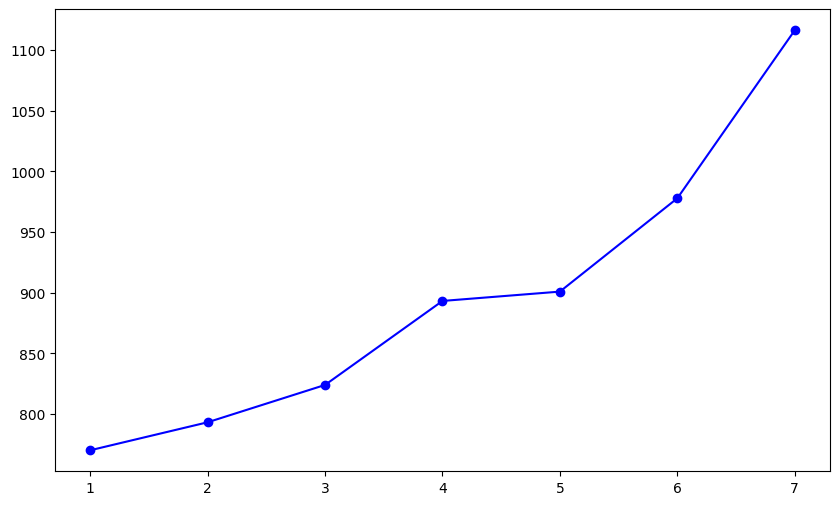

In [97]:
time_df = [pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Consensus_time_byzantine.csv"), pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel_consensus_time.csv")]
time_name = ["NKN Consensus time", "PoW Consensus time"]
save_same = ["NKNConsnsusPlot", "PoWConsensusPlot"]

(time_df[i], time_name[i], save_same[i])
    
    
def time_scatter(df1, df2, title, save_name):
    
    print(df2)
    df1_mean = df1.mean()
    df2_mean = df2.mean()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_values = df1.columns
    
    ax.scatter(x_values, df1_mean, color='blue', s=36, label='NKN')
    ax.plot(x_values, df1_mean, color='blue')
    
    ax.scatter(x_values, df2_mean, color='red', s=36, label='PoW')
    ax.plot(x_values, df2_mean, color='red')
    
    
    ax.set_xlabel('No of byzantine nodes')
    ax.set_ylabel('Consensus time (s)')
    
    ax.legend()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.show()
    
time_scatter(time_df[0], time_df[1],"Comparison of consensus times","TimeGraph")

In [ ]:
df_times = pd.read_csv("/Users/zaza/Main/Code/Python/toychain-argos-ca-consensus/HelloNeighbor/results/csvs/Strobel/StrobelConsensusTimes.csv")

